define the predicted number for model creation.

In [1]:
number=2

In our program, we need a few libraries:
<br>1- Tensorflow: to create a model.
<br>2- Matplotlib: to display images in graphical form.
<br>3- random: to randomly choose a number.
<br>4- Numpy: for the use of matrices.

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib. pyplot as plt
import random as rnd
import numpy as np

# Import the data
import the database from the library "tensorflow.keras"

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

Traverse the lists (X_train and X_test) and check if y is equal to the number defined earlier. If it is true, do nothing; if it is not equal, then it is false.

In [4]:
for i in range(len(Y_train)):
    if Y_train[i]==number:
        Y_train[i]=True
    else:
        Y_train[i]=False
        
for i in range(len(Y_test)):
    if Y_test[i]==number:
        Y_test[i]=True
    else:
        Y_test[i]=False

Displaying the size of the arrays and the dimensions of the images.

In [5]:
print("shape of x_train",X_train.shape)
print("shape of Y_train",Y_train.shape)
print("shape of X_test",X_test.shape)
print("shape of Y_test",Y_test.shape)

shape of x_train (60000, 28, 28)
shape of Y_train (60000,)
shape of X_test (10000, 28, 28)
shape of Y_test (10000,)


# Reshaping the data.

The function toBinaryMatrix(X) enables eliminating grayscale and replacing it with white if the pixel value is greater than or equal to 127; otherwise, it is replaced by black. Black is represented by 0, and white is represented by 1.

In [6]:
def toBainryMatrix(X):
    new_X=[]
    for img in X:
        newImg=[]
        for line in img:
            newLine=[]
            for pixel in line:
                if pixel<127:
                    newLine.append(1)
                else:
                    newLine.append(0)
            newImg.append(newLine)
        new_X.append(newImg)
    return np.array(new_X)

The function reverseBlackWhite(X) reverses the black and white colors.

In [7]:
def reverseBlackWhite(X):
    new_X=[]
    for img in X:
        newImg=[]
        for line in img:
            newLine=[]
            for pixel in line:
                if pixel==1:
                    newLine.append(0)
                else:
                    newLine.append(1)
            newImg.append(newLine)
        new_X.append(newImg)
    return np.array(new_X)

The function extractSubMatrix(X) divides the matrix into 16 submatrices (4x4). Each submatrix contains 7 rows and 7 columns.

In [8]:
def extractSubMatrix(X):
    new_X=[]

    for img in X:
        i=0
        step=len(img)/4
        newImage=[]
        while i<len(img):
            end_row=i+step
            j=0
            while j<len(img):
                end_column=j+step
                block=img[int(i):int(end_row),int(j):int(end_column)]
                j=j+step
                newImage.append(block)
            i=i+step
        newImage=np.array(newImage)
        new_X.append(newImage)
    new_X=np.array(new_X)
    
    return new_X

The function imageToVector(X) transforms the images into vectors. The applied treatment is as follows:
<br>
Replace each submatrix (7x7) with a number between [0, 1], equal to (number of black pixels / total number of pixels).

In [9]:
def imageToVector(X):
    new_X=[]
    for img in X:
        new_img=[]
        for block in img:
            blacks=0
            for line in block:
                for pixel in line:
                    if pixel==1:
                        blacks=blacks+1
            new_img.append(blacks/49)
        new_X.append(new_img)
    return np.array(new_X)
    

In [10]:
train=toBainryMatrix(X_train)
test=toBainryMatrix(X_test)

In [11]:
train=reverseBlackWhite(train)
test=reverseBlackWhite(test)
print(train[0])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 

In [12]:
train=extractSubMatrix(train)
test=extractSubMatrix(test)
train[0]

array([[[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],


In [13]:
new_X_train=imageToVector(train)
new_X_test=imageToVector(test)
Y_train=Y_train.reshape(len(Y_train),1)
Y_test=Y_test.reshape(len(Y_test),1)

Display the dimensions after the treatments.

In [14]:
print("shape of x_train",new_X_train.shape)
print("shape of Y_train",Y_train.shape)
print("shape of X_test",new_X_test.shape)
print("shape of Y_test",Y_test.shape)

shape of x_train (60000, 16)
shape of Y_train (60000, 1)
shape of X_test (10000, 16)
shape of Y_test (10000, 1)


In [15]:
new_X_train[0]

array([0.        , 0.06122449, 0.20408163, 0.10204082, 0.        ,
       0.48979592, 0.2244898 , 0.        , 0.        , 0.06122449,
       0.57142857, 0.        , 0.10204082, 0.42857143, 0.04081633,
       0.        ])

In [16]:
new_X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.02040816,
       0.28571429, 0.46938776, 0.02040816, 0.        , 0.02040816,
       0.32653061, 0.        , 0.        , 0.28571429, 0.02040816,
       0.        ])

# Model

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(16,)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 512)               8704      
                                                                 
 dense_1 (Dense)             (None, 250)               128250    
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 137,205
Trainable params: 137,205
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [20]:
model.fit(new_X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1057 - accuracy: 0.9652
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0716 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0653 - accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0624 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0609 - accuracy: 0.9789


evaluer le modele pour le pourcentage de reussite et de perte en utilisant X et Y de test

In [21]:
model.evaluate(new_X_test,Y_test)

313/313 [==============================] - 0s 892us/step - loss: 0.0655 - accuracy: 0.9778


[0.0654883161187172, 0.9778000116348267]

# Prediction
Choose a random number.
Represent it graphically.
Predict the number.
If the result > 0.5, display "it's a number."
If not, display "it's not a number."

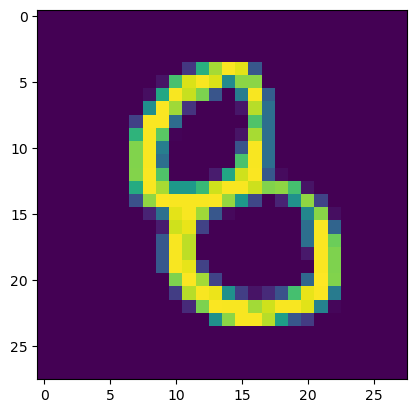

313/313 [==============================] - 0s 773us/step
[0.04831472]
it's not a number 2


In [22]:
index=rnd.randint(0,len(new_X_test)-1)

#pour teste la preiction sur le nombre 5
#index=15

#pour teste la prediction sur le number 2
#index=1

plt.imshow(X_test[index])
plt.show()

predictions=model.predict(new_X_test)
y=predictions[index]
print(y)

if y>0.5:
    print("it's a number "+str(number))
else:
    print("it's not a number "+str(number))